# Pacotes

In [ ]:
# Instalando o Tensor Flow

!pip install tensorflow -q

# 1 - Rede Neural Básica

Usando a base de dados MNIST, que vimos nos materiais de aula, teste variações no modelo básico utilizado para tentar melhorar o seu desempenho na base de validação. Em particular, tente:

1. Aumentar o número de camadas;
2. Aumentar o número de unidades ocultas;
3. Alterar o tamanho dos batches.

## Carregando os dados

In [ ]:
import numpy as np
from tensorflow import keras


# Carrega as imagens do MNIST
(X_treino, y_treino), (X_teste, y_teste) = keras.datasets.mnist.load_data()

# Separamos 5 mil imagens para validacao

X_treino, X_validacao = X_treino[:55000], X_treino[55000:]
y_treino, y_validacao = y_treino[:55000], y_treino[55000:]

# Aqui, precisamos alterar a estrutura da matriz que armazena os dados 
# (28 x 28 pixels cada uma possui)

X_treino = X_treino.reshape(55000, 28, 28, 1)
X_validacao = X_validacao.reshape(5000, 28, 28, 1)
X_teste = X_teste.reshape(10000, 28, 28, 1)

# As cores são representadas de 1 a 255
# Com esse passo, deixamos todas variarem de 0 a 1 (como scale)
X_treino = X_treino / 255
X_validacao = X_validacao / 255
X_teste = X_teste / 255

# Converte os targets para one-hot
y_treino = keras.utils.to_categorical(y_treino, 10)
y_validacao = keras.utils.to_categorical(y_validacao, 10)
y_teste = keras.utils.to_categorical(y_teste, 10)



11490434/11490434 [==============================] - 2s 0us/step


# GPU do colab

In [ ]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

elif device_name == '/device:GPU:0':
  print("GPU disponível")




GPU disponível


## Treinando o modelo baseline e avaliando seus resultados

In [ ]:
# Garantindo que estamos usando a GPU
with tf.device('/device:GPU:0'):
  # Definindo a arquitetura do modelo
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(32, activation="relu", input_shape=(28, 28, 1)))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(10, activation="softmax"))

  # Compila o Modelo
  model.compile(optimizer="adam", 
                loss="categorical_crossentropy", 
                metrics=["accuracy"])

  # Treina o modelo
  model.fit(X_treino, 
            y_treino, 
            batch_size=64, 
            epochs=10, 
            validation_data=(X_validacao, y_validacao))

  # Faz predicoes na amostra de teste
  print(" ")
  print("Avaliando os resultados do modelo")
  model.evaluate(X_teste, y_teste)

Epoch 1/10
860/860 [==============================] - 6s 4ms/step - loss: 0.3892 - accuracy: 0.8910 - val_loss: 0.2395 - val_accuracy: 0.9358
Epoch 2/10
860/860 [==============================] - 4s 5ms/step - loss: 0.2943 - accuracy: 0.9161 - val_loss: 0.2294 - val_accuracy: 0.9360
Epoch 3/10
860/860 [==============================] - 5s 6ms/step - loss: 0.2828 - accuracy: 0.9209 - val_loss: 0.2157 - val_accuracy: 0.9416
Epoch 4/10
860/860 [==============================] - 5s 6ms/step - loss: 0.2741 - accuracy: 0.9223 - val_loss: 0.2266 - val_accuracy: 0.9366
Epoch 5/10
860/860 [==============================] - 5s 6ms/step - loss: 0.2700 - accuracy: 0.9240 - val_loss: 0.2195 - val_accuracy: 0.9384
Epoch 6/10
860/860 [==============================] - 3s 4ms/step - loss: 0.2672 - accuracy: 0.9255 - val_loss: 0.2317 - val_accuracy: 0.9372
Epoch 7/10
860/860 [==============================] - 3s 4ms/step - loss: 0.2629 - accuracy: 0.9254 - val_loss: 0.2157 - val_accuracy: 0.9408
Epoch 

In [ ]:
# Output do modelo até o momento

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28, 28, 32)        64        
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense_1 (Dense)             (None, 10)                250890    
                                                                 
Total params: 250,954
Trainable params: 250,954
Non-trainable params: 0
_________________________________________________________________


## Visualizando os dados do treinamento

In [ ]:
from matplotlib import pyplot as plt


historico = model.fit(X_treino, 
            y_treino, 
            batch_size=64, 
            epochs=10, 
            validation_data=(X_validacao, y_validacao),
            verbose = 0) # Silenciando o output do modelo


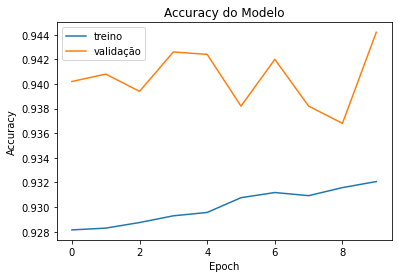

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Accuracy do Modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['treino', 'validação'], loc='upper left')
plt.show()

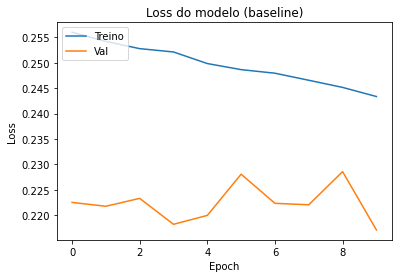

In [ ]:
# Loss

plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Loss do modelo (baseline)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Treino', 'Val'], loc='upper left')
plt.show()

A loss de ambos o treinamento e a validação parecem estar caindo até a epoch 10, parece ser possível aumentar esse valor sem riscos de overfitting. Vamos testar isso em um segundo modelo.

In [ ]:
# Garantindo que estamos usando a GPU
with tf.device('/device:GPU:0'):
  # Definindo a arquitetura do modelo
  model2 = keras.models.Sequential()
  model2.add(keras.layers.Dense(32, activation="relu", input_shape=(28, 28, 1)))
  model2.add(keras.layers.Flatten())
  model2.add(keras.layers.Dense(10, activation="softmax"))

  # Compila o Modelo
  model2.compile(optimizer="adam", 
                loss="categorical_crossentropy", 
                metrics=["accuracy"])

  # Treina o modelo
  model2.fit(X_treino, 
            y_treino, 
            batch_size=64, 
            epochs=30, # Por enquanto, só alterar o número de epochs
            validation_data=(X_validacao, y_validacao))

  # Faz predicoes na amostra de teste
  print(" ")
  print("Avaliando os resultados do modelo")
  model2.evaluate(X_teste, y_teste)

Epoch 1/30
860/860 [==============================] - 4s 4ms/step - loss: 0.3812 - accuracy: 0.8940 - val_loss: 0.2370 - val_accuracy: 0.9328
Epoch 2/30
860/860 [==============================] - 3s 4ms/step - loss: 0.2936 - accuracy: 0.9171 - val_loss: 0.2373 - val_accuracy: 0.9352
Epoch 3/30
860/860 [==============================] - 3s 4ms/step - loss: 0.2820 - accuracy: 0.9209 - val_loss: 0.2262 - val_accuracy: 0.9380
Epoch 4/30
860/860 [==============================] - 3s 4ms/step - loss: 0.2761 - accuracy: 0.9217 - val_loss: 0.2186 - val_accuracy: 0.9410
Epoch 5/30
860/860 [==============================] - 3s 4ms/step - loss: 0.2689 - accuracy: 0.9242 - val_loss: 0.2135 - val_accuracy: 0.9424
Epoch 6/30
860/860 [==============================] - 3s 4ms/step - loss: 0.2679 - accuracy: 0.9243 - val_loss: 0.2181 - val_accuracy: 0.9434
Epoch 7/30
860/860 [==============================] - 4s 4ms/step - loss: 0.2647 - accuracy: 0.9257 - val_loss: 0.2267 - val_accuracy: 0.9372
Epoch 

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 28, 28, 32)        64        
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 10)                250890    
                                                                 
Total params: 250,954
Trainable params: 250,954
Non-trainable params: 0
_________________________________________________________________


Ainda não mudamos a arquitetura do modelo e, portanto, não há mudanças no summary.

In [ ]:
historico2 = model2.fit(X_treino, 
            y_treino, 
            batch_size=64, 
            epochs=30, 
            validation_data=(X_validacao, y_validacao),
            verbose = 0) # Silenciando o output do modelo

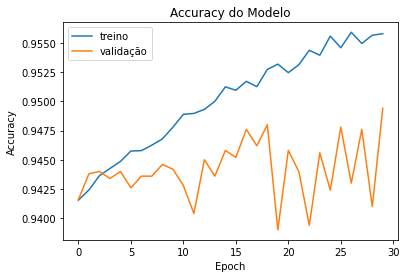

In [ ]:
plt.plot(historico2.history['accuracy'])
plt.plot(historico2.history['val_accuracy'])
plt.title('Accuracy do Modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['treino', 'validação'], loc='upper left')
plt.show()

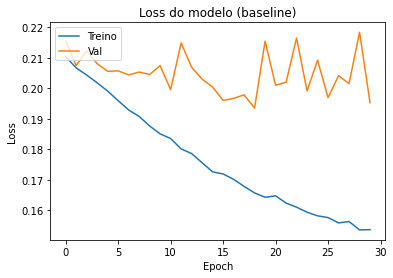

In [ ]:
plt.plot(historico2.history['loss'])
plt.plot(historico2.history['val_loss'])
plt.title('Loss do modelo (baseline)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Treino', 'Val'], loc='upper left')
plt.show()

Observa-se que, apesar do aumento do número de épocas, não há ganhos reais na validação. Portanto, os próximos modelos utilizarão 10 épocas como padrão.

## *Tuning* dos hiperparâmetros

Nessa parte, para facilitar a escolha dos hiperparâmetros, segui este [tutorial](https://www.analyticsvidhya.com/blog/2021/08/hyperparameter-tuning-of-neural-networks-using-keras-tuner/) e outro do [site](https://keras.io/guides/keras_tuner/custom_tuner/) oficial do Keras para automatizar esse processo.

Outros Links: [1](https://github.com/keras-team/keras-tuner/issues/122)
[2](https://keras.io/guides/keras_tuner/getting_started/#tune-model-training)

In [ ]:
!pip install keras_tuner -q

In [ ]:
import keras_tuner
from tensorflow.keras import layers

class MyHyperModel(keras_tuner.HyperModel):
  # Criando a classe do hypermodel
    def build(self, hp):
      # Arquitetura do Modelo
        model = keras.Sequential()
        # Camada Flatten
        model.add(layers.Flatten(input_shape=(28, 28, 1)))
        # 1° Camada Densa com tuning
        model.add(
            layers.Dense(
                units= hp.Int("units",
                              min_value=32,
                              max_value=512,
                              step=32), # Deixar o tuner decidir o núemro de unidades
                activation= hp.Choice("activation", ["relu", "tanh"]), # E o modo de ativação
            )
        )
        # Decidir se deve ou não usar dropout antes da camada de output
        if hp.Boolean("dropout"):
          model.add(layers.Dropout(rate=0.25))
        # Camada Densa final de output com 10 classes
        model.add(layers.Dense(10, # N° de Classes
                               activation="softmax") # Método de ativação
                               )
        # Definindo os valores para a decisão do learning rate
        hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
            loss="categorical_crossentropy", 
            metrics=["accuracy", "Precision", "Recall"],
        )
        return model

    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            # Tunando o batch size
            batch_size=hp.Int("batch_size", min_value = 16,
                              max_value = 128,
                              step = 16),
            **kwargs,
        )

tuner = keras_tuner.RandomSearch(
    MyHyperModel(),
    objective="val_accuracy",
    max_trials=3,
    overwrite=True,
    directory="my_dir",
    project_name="tune_hypermodel",
)

In [ ]:
# hypertuning settings
tuner.search_space_summary() 

Search space summary
Default search space size: 4
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
# Parando os trials antes do tempo

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Perform hypertuning
tuner.search(X_treino,
             y_treino,
             epochs=10, 
             validation_data=(X_validacao, y_validacao),
             callbacks=[stop_early])

Trial 3 Complete [00h 00m 36s]
val_accuracy: 0.9750000238418579

Best val_accuracy So Far: 0.9825999736785889
Total elapsed time: 00h 03m 33s


Resultados do Tuning

In [ ]:
# Melhores hiperparâmetros

best_hps = tuner.get_best_hyperparameters()[0]
print(best_hps.values)

# Melhor Modelo

best_model = tuner.get_best_models()[0]
best_model.summary()

{'units': 480, 'activation': 'relu', 'dropout': False, 'learning_rate': 0.001, 'batch_size': 16}
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 480)               376800    
                                                                 
 dense_1 (Dense)             (None, 10)                4810      
                                                                 
Total params: 381,610
Trainable params: 381,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
best_model.fit(X_treino,
             y_treino,
             epochs=1, 
             validation_data=(X_validacao, y_validacao))

1719/1719 [==============================] - 8s 4ms/step - loss: 0.0056 - accuracy: 0.9983 - precision: 0.9984 - recall: 0.9983 - val_loss: 0.0816 - val_accuracy: 0.9834 - val_precision: 0.9838 - val_recall: 0.9832


Resultados para 1 epoch:

loss: 0.0056; accuracy: 0.9983; precision: 0.9984; recall: 0.9983;

val_loss: 0.0816; val_accuracy: 0.9834; val_precision: 0.9838; val_recall: 0.9832

# Repetir os resultados em 10 epochs

In [ ]:
history = best_model.fit(X_treino,
             y_treino,
             epochs=10, 
             validation_data=(X_validacao, y_validacao))

Epoch 1/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0090 - accuracy: 0.9967 - precision: 0.9967 - recall: 0.9966 - val_loss: 0.0962 - val_accuracy: 0.9842 - val_precision: 0.9852 - val_recall: 0.9840
Epoch 2/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0049 - accuracy: 0.9984 - precision: 0.9985 - recall: 0.9984 - val_loss: 0.0956 - val_accuracy: 0.9848 - val_precision: 0.9848 - val_recall: 0.9844
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0057 - accuracy: 0.9984 - precision: 0.9984 - recall: 0.9984 - val_loss: 0.0941 - val_accuracy: 0.9838 - val_precision: 0.9846 - val_recall: 0.9838
Epoch 4/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0060 - accuracy: 0.9980 - precision: 0.9981 - recall: 0.9980 - val_loss: 0.1038 - val_accuracy: 0.9832 - val_precision: 0.9842 - val_recall: 0.9826
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0064 - accuracy: 

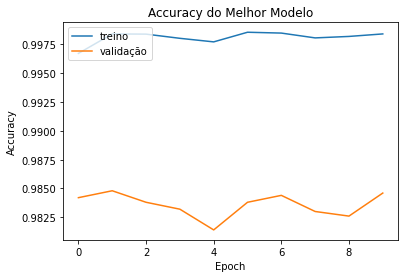

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy do Melhor Modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['treino', 'validação'], loc='upper left')
plt.show()

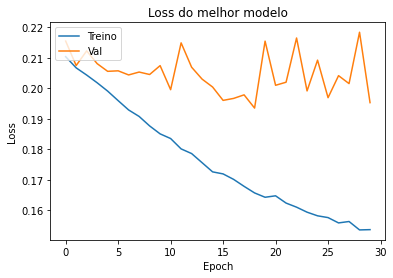

In [ ]:
plt.plot(historico2.history['loss'])
plt.plot(historico2.history['val_loss'])
plt.title('Loss do melhor modelo')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Treino', 'Val'], loc='upper left')
plt.show()

## Conclusão 

O melhor resultado parece ser o do modelo hypertuned com 3 epochs. Dado que, após esse número de epochs, a loss da validação só aumenta

# 2 - Rede neural convolucional

Agora, adaptando o código que vimos para um modelo neural convolucional, repita o esforço do exercício 1 e tente melhorar o seu desempenho na base de validação.


Iremos direto para o hypertuning do modelo convolucional


In [ ]:
class ConvHyperModel(keras_tuner.HyperModel):
  # Criando a classe do hypermodel
    def build(self, hp):
      # Arquitetura do Modelo
        model = keras.Sequential()

        # Camada Conv2D
        activation = hp.Choice("activation", ["relu", "tanh"])
        model.add(keras.layers.Conv2D(
            filters = hp.Int("units", min_value=32, max_value=512, step=32),
            kernel_size=3,
            activation=activation, 
            input_shape=(28,28,1)))
        
        # Camada Flatten
        model.add(keras.layers.Flatten())

        # Decidir ou não pela Camada Densa com tuning
        if hp.Boolean('Dense'):
          model.add(
              layers.Dense(
                  units= hp.Int("units", min_value=32, max_value=512, step=32), # Deixar o tuner decidir o núemro de unidades
                  activation= activation), # E o modo de ativação
              )
          
        # Decidir se deve ou não usar dropout antes da camada de output

        if hp.Boolean("dropout"):
          model.add(layers.Dropout(rate=0.25))

        # Camada Densa final de output com 10 classes
        model.add(layers.Dense(10, # N° de Classes
                               activation="softmax") # Método de ativação
                               )
        
        # Definindo os valores para a decisão do learning rate
        hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
            loss="categorical_crossentropy", 
            metrics=["accuracy", "Precision", "Recall"],
        )
        return model



    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            # Tunando o batch size
            batch_size=hp.Int("batch_size", min_value = 16,
                              max_value = 128,
                              step = 16),
            **kwargs,
        )

tuner = keras_tuner.RandomSearch(
    ConvHyperModel(),
    objective="val_accuracy",
    max_trials=3,
    overwrite=True,
    directory="my_dir",
    project_name="tune_hypermodel",
)

In [ ]:
# hypertuning settings
tuner.search_space_summary() 

Search space summary
Default search space size: 5
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
Dense (Boolean)
{'default': False, 'conditions': []}
dropout (Boolean)
{'default': False, 'conditions': []}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
# Parando os trials antes do tempo

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Perform hypertuning
tuner.search(X_treino,
             y_treino,
             epochs=10, 
             validation_data=(X_validacao, y_validacao),
             callbacks=[stop_early])

Trial 3 Complete [00h 02m 17s]
val_accuracy: 0.9864000082015991

Best val_accuracy So Far: 0.9864000082015991
Total elapsed time: 00h 10m 16s


In [ ]:
# Melhores hiperparâmetros

best_hps = tuner.get_best_hyperparameters()[0]
print(best_hps.values)

# Melhor Modelo

best_model = tuner.get_best_models()[0]
best_model.summary()

{'activation': 'relu', 'units': 480, 'Dense': False, 'dropout': True, 'learning_rate': 0.0001, 'batch_size': 112}
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 480)       4800      
                                                                 
 flatten (Flatten)           (None, 324480)            0         
                                                                 
 dropout (Dropout)           (None, 324480)            0         
                                                                 
 dense (Dense)               (None, 10)                3244810   
                                                                 
Total params: 3,249,610
Trainable params: 3,249,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
best_model.fit(X_treino,
             y_treino,
             epochs=1, 
             validation_data=(X_validacao, y_validacao))

1719/1719 [==============================] - 19s 11ms/step - loss: 0.0486 - accuracy: 0.9855 - precision: 0.9881 - recall: 0.9836 - val_loss: 0.0593 - val_accuracy: 0.9854 - val_precision: 0.9876 - val_recall: 0.9842


In [ ]:
history = best_model.fit(X_treino,
             y_treino,
             epochs=10, 
             validation_data=(X_validacao, y_validacao))

Epoch 1/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.0370 - accuracy: 0.9895 - precision: 0.9910 - recall: 0.9880 - val_loss: 0.0591 - val_accuracy: 0.9844 - val_precision: 0.9864 - val_recall: 0.9834
Epoch 2/10
1719/1719 [==============================] - 18s 11ms/step - loss: 0.0311 - accuracy: 0.9914 - precision: 0.9929 - recall: 0.9900 - val_loss: 0.0545 - val_accuracy: 0.9854 - val_precision: 0.9870 - val_recall: 0.9852
Epoch 3/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.0266 - accuracy: 0.9923 - precision: 0.9934 - recall: 0.9913 - val_loss: 0.0596 - val_accuracy: 0.9860 - val_precision: 0.9882 - val_recall: 0.9852
Epoch 4/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.0231 - accuracy: 0.9936 - precision: 0.9943 - recall: 0.9929 - val_loss: 0.0603 - val_accuracy: 0.9844 - val_precision: 0.9858 - val_recall: 0.9836
Epoch 5/10
1719/1719 [==============================] - 19s 11ms/step - loss: 0.0202 - a

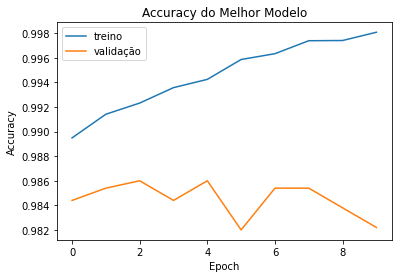

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy do Melhor Modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['treino', 'validação'], loc='upper left')
plt.show()

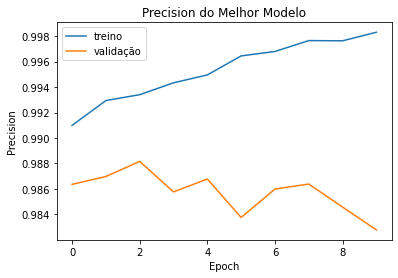

In [ ]:
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Precision do Melhor Modelo')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['treino', 'validação'], loc='upper left')
plt.show()

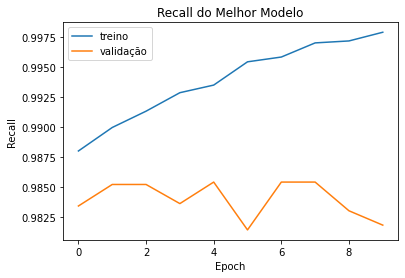

In [ ]:
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Recall do Melhor Modelo')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['treino', 'validação'], loc='upper left')
plt.show()

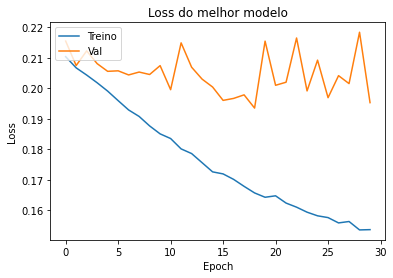

In [ ]:
plt.plot(historico2.history['loss'])
plt.plot(historico2.history['val_loss'])
plt.title('Loss do melhor modelo')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Treino', 'Val'], loc='upper left')
plt.show()

Os melhores resultados se apresentam com 1 ou 2 epochs. Após esse número de epochs, os resultados da validação começam a declinar. 